In [1]:
# 예제 7.1 합성곱 신경망을 제작하고 정확도를 출력하는 코드

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
mnist = tf.keras.datasets.mnist

# construct CNN
# set models tf.reset_default_graph()
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

ds_train = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)
).shuffle(1000).batch(64)
ds_test = tf.data.Dataset.from_tensor_slices(
    (x_test, y_test)
).batch(64)
input_shape = (28, 28, 1)
num_classes = 10
'''
inputs = layers.Input(input_shape, dtype=tf.float64)
hidden_1 = layers.Conv2D(5, (5, 5), padding='SAME')(inputs)
pool_1 = layers.MaxPooling2D(pool_size=(2, 2))(hidden_1)
#act_1 = layers.Activation('relu')(hidden_1)

hidden_2 = layers.Conv2D(5, (5, 5), padding='SAME')(pool_1)
#net = layers.Activation('relu')(hidden_2)
pool_2 = layers.MaxPooling2D(pool_size=(2, 2))(hidden_2)


hidden_3 = layers.Conv2D(20, (5, 5), padding='SAME')(pool_2)
#net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(hidden_3)

net = layers.Flatten()(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net)
'''
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(input_shape, dtype=tf.float64),
  tf.keras.layers.Conv2D(5, (5, 5), activation='relu' ,padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

  tf.keras.layers.Conv2D(5, (5, 5),activation='relu', padding='same'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

  tf.keras.layers.Conv2D(20, (5, 5),activation='relu', padding='same'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])
opt = keras.optimizers.Adam(learning_rate=1e-4)
# learning
model.compile(optimizer= opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
history  = model.fit(ds_train, epochs=5, validation_data = ds_test)

11501568/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 5)         130       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 5)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 5)         630       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 5)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 20)          2520      
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 20)          0         
_________________________________________________________

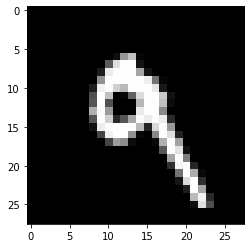

In [2]:
idx = 7
imageToUse = x_test[idx]
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap='gray')

In [3]:
layer_outputs = [layer.output for layer in model.layers]
layer_outputs

[<KerasTensor: shape=(None, 28, 28, 5) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 14, 14, 5) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 14, 14, 5) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 7, 7, 5) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 7, 7, 20) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 7, 7, 20) dtype=float32 (created by layer 'dropout')>,
 <KerasTensor: shape=(None, 980) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>]

In [4]:
feature_map_model = models.Model(inputs=model.inputs, outputs=layer_outputs)

In [5]:
feature_map_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 5)         130       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 5)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 5)         630       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 5)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 20)          2520      
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 20)          0     

In [6]:
imageToUse = imageToUse.reshape(-1,28,28,1)
feature_map = model.predict(imageToUse)

In [7]:
from keras import backend as K
weights = model.get_weights()
activations = []
for layer in model.layers:
    keras_function = K.function([model.input], [layer.output])
    activations.append(keras_function(imageToUse))#get activation?

In [8]:
print(activations[0][0].shape)
print(activations[1][0].shape)
print(activations[2][0].shape)
print(activations[3][0].shape)
print(activations[4][0].shape)
print(activations[5][0].shape)
print(activations[6][0].shape)
print(activations[7][0].shape)
Activations =[]
Activations.append(activations[0][0])
Activations.append(activations[1][0])
Activations.append(activations[2][0])
Activations.append(activations[3][0])
Activations.append(activations[4][0])









(1, 28, 28, 5)
(1, 14, 14, 5)
(1, 14, 14, 5)
(1, 7, 7, 5)
(1, 7, 7, 20)
(1, 7, 7, 20)
(1, 980)
(1, 10)


In [9]:
weights = model.get_weights()

In [10]:
print(weights[0].shape)
print(weights[1].shape)
print(weights[2].shape)
print(weights[3].shape)
print(weights[4].shape)
print(weights[5].shape)
print(weights[6].shape)
print(weights[7].shape)

(5, 5, 1, 5)
(5,)
(5, 5, 5, 5)
(5,)
(5, 5, 5, 20)
(20,)
(980, 10)
(10,)


In [11]:
biases = []
biases.append(weights[1])
biases.append(weights[3])
biases.append(weights[5])
biases.append(weights[7])


In [12]:
w = []
w.append
w.append(weights[0])
w.append(weights[2])
w.append(weights[4])
w.append(weights[6])



In [13]:
imageToUse = imageToUse.reshape(-1,28,28,1)
predict = model.predict(imageToUse)
print(predict)
# 예제 7.7 학습된 합성곱 신경망으로부터 분류 가능성이 최대가 되는 카테고리를 구하는 코드
f_x = max(predict[0])
f_x_idx = np.argmax(predict[0])
print(f_x)
print(f_x_idx) 

[[1.8672165e-07 1.1979492e-06 3.1056756e-05 6.8859104e-03 1.0375939e-01
  2.4738431e-04 1.3994692e-05 9.7074117e-06 2.2655712e-04 8.8882464e-01]]
0.88882464
9


In [14]:
# 예제 7.8 완전 연결 신경망에서 역전파 기울기를 구하는 수도 코드

# get FC layer gradient
def getGradient(activation, weight, bias):
    # forward pass
    W = tf.maximum(0., weight)
    b = tf.maximum(0., bias)
    z = tf.matmul(activation, w) + b

    # backward pass
    dX = tf.matmul(1/z, tf.transpose(W))
    return dX


In [15]:
#  예제 7.9 f_x로부터 바로 직전 은닉층의 타당성 전파 값을 구하는 코드

R4 = predict[0]
R4.shape

(10,)

In [16]:
print(np.sum(R4))

1.0


In [17]:
# 예제 7.9 FC 연결에서 LRP를 수행하는 코드. 예제 7.8의 역전파 기울기를 구하는 코드에 타당성 변수(relevance)를 곱한다

def backprop_dense(activation, weight, bias, relevance):
    w = tf.maximum(0., weight)
    b = tf.maximum(0., bias)
    z = tf.matmul(activation, w) + b
    s = relevance / z
    c = tf.matmul(s, tf.transpose(w))
    return activation * c


In [18]:
# 예제 7.10 예제 7.9에서 만든 LRP 공식으로 𝑅3를 구하는 코드

# layers = [hidden_1, pool_1, hidden_2, pool_2, hidden_3]
# (1, 28, 28, 5) (1, 14, 14, 5) (1, 7, 7, 20)
# activation, weights, biases
a = Activations.pop()
ws = w.pop()
b = biases.pop()

print(a.shape)
print(ws.shape)

R3 = backprop_dense(a.reshape(1,980), ws, b, R4)

print(R3.shape)


(1, 7, 7, 20)
(980, 10)
(1, 980)


In [19]:
print(np.sum(R3))

0.9980358


In [20]:
# 예제 7.11-(1) 언풀링 연산에서 LRP를 구하는 코드

from tensorflow.python.ops import gen_nn_ops

def backprop_pooling(activation, relevance):
    # kernel size, strides
    # if z is zero
    ksize = strides = [1, 2, 2, 1]
    z = tf.nn.max_pool(activation, ksize, strides, padding='SAME') + 1e-10
    s = relevance / z
    # input, argmax, argmax_mask
    c = gen_nn_ops.max_pool_grad(activation, z, s, ksize, strides, padding='SAME')
    return activation * c


In [21]:
# 예제 7.11-(2) 역합성곱 연산에서 LRP를 구하는 코드

def backprop_conv(activation, weight, bias, relevance):
    strides = [1, 1, 1, 1]
    w = tf.maximum(0., weight)
    b = tf.maximum(0., bias)
    z = tf.nn.conv2d(activation, w, strides, padding='SAME')
    z = tf.nn.bias_add(z, b)
    s = relevance / z
    c = tf.compat.v1.nn.conv2d_backprop_input(tf.shape(activation), w, s, strides, padding='SAME')
    return activation * c


In [22]:
# 예제 7.12 𝑅3 벡터로부터 역합성곱과 언풀링 연산을 수행하고 𝑅2 벡터를 구하는 코드

# layers = [hidden_1, pool_1, hidden_2, pool_2]
# (1, 28, 28, 5)(1, 14, 14, 5)(1, 7, 7, 20)
# activation, weights, biases
ws = w.pop()
b = biases.pop()
p = Activations.pop()
a = Activations.pop()
print(p.shape)

# convolution backprop
R_conv = backprop_conv(p, ws, b, tf.reshape(R3, [1, 7, 7, 20]))
print(R_conv.shape)
R2 = backprop_pooling(a, R_conv)
print(np.sum(R2))
print(R2.shape)

(1, 7, 7, 5)
(1, 7, 7, 5)
0.9978416
(1, 14, 14, 5)


In [23]:
# 예제 7.11 𝑅2에서 역합성곱과 언풀링 과정을 수행하고 𝑅1 벡터를 구하는 코드

# layers = [hidden_1, pool_1]
# (1, 28, 28, 5)(1, 14, 14, 5)
# activation, weights, biases

ws = w.pop()
b = biases.pop()
p = Activations.pop()
a = Activations.pop()

# convolution backprop
R_conv = backprop_conv(p, ws, b, R2)
print(R_conv.shape)

R1 = backprop_pooling(a, R_conv)
print(R1.shape)
print(np.sum((R1)))


(1, 14, 14, 5)
(1, 28, 28, 5)
0.9978093


In [24]:
a.shape

(1, 28, 28, 5)

In [25]:
# 예제 7.12 𝑅1 결과에서 원본 이미지까지 LRP를 수행하는 코드

img_activations = imageToUse
ws = w.pop()
b = biases.pop()
R0 = backprop_conv(img_activations, ws, b, R1)
LRP_out = R0

In [26]:
LRP_out = tf.reshape(LRP_out, (28,28))

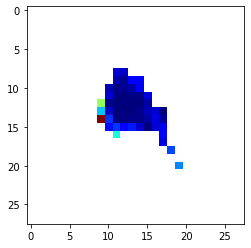

In [27]:
# 예제 7.13 원본 이미지 형태로 타당성 전파를 수행하고 결과물을 이미지 형태로 출력하는 코드

plt.imshow(LRP_out, interpolation="nearest", cmap=plt.cm.jet)

In [28]:
# 예제 7.13 합성곱 신경망 전체에 대해 LRP를 수행하는 코드

def getLRP(img):
    imageToUse = img.reshape(-1,28,28,1)
    predict = model.predict(imageToUse)[0]
    activations = []
    for layer in model.layers:
        keras_function = K.function([model.input], [layer.output])
        activations.append(keras_function(imageToUse))#get activation?

    Activations =[]
    Activations.append(activations[0][0])
    Activations.append(activations[1][0])
    Activations.append(activations[2][0])
    Activations.append(activations[3][0])
    Activations.append(activations[4][0])
    weights = model.get_weights()
    w = []
    w.append
    w.append(weights[0])
    w.append(weights[2])
    w.append(weights[4])
    w.append(weights[6])
    biases = []
    biases.append(weights[1])
    biases.append(weights[3])
    biases.append(weights[5])
    biases.append(weights[7])


    # get f_x
    f_x = max(predict)

    # get R4
    predict[predict < 0] = 0
    R4 = predict


    # get R3

    a = Activations.pop()
    ws = w.pop()
    b = biases.pop()
    R3 = backprop_dense(a.reshape(1,980), ws, b, R4)

    

    # get R2
    ws = w.pop()
    b = biases.pop()
    p = Activations.pop()
    a = Activations.pop()
    R_conv = backprop_conv(p, ws, b, tf.reshape(R3, [1, 7, 7, 20]))
    R2 = backprop_pooling(a, R_conv)


    # get R1
    ws = w.pop()
    b = biases.pop()
    p = Activations.pop()
    a = Activations.pop()
    R_conv = backprop_conv(p, ws, b, R2)
    R1 = backprop_pooling(a, R_conv)

    # get R0
    
    ws = w.pop()
    b = biases.pop()
    
    R0 = backprop_conv(imageToUse, ws, b, R1)
    
  
    return R0


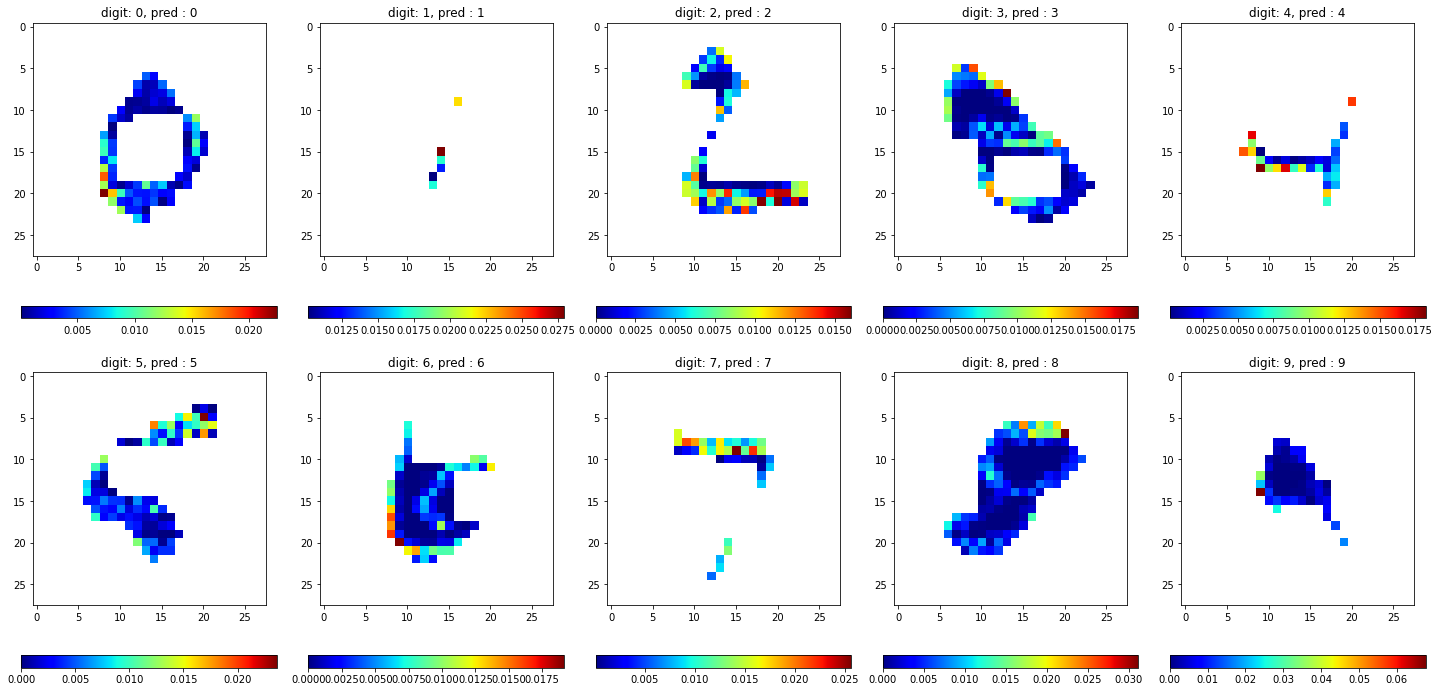

In [29]:
# 예제 7.13 합성곱 신경망 전체에 대해 LRP를 수행하는 코드

# get MNIST dataset index dict
mnist_dict = {}
idx = 0
for i in y_test:

    if mnist_dict.get(i):
        mnist_dict[i].append(idx)
    else:
        mnist_dict[i] = [idx]
    idx += 1

# get LRP
nums = []
idxs = {}
for i in range(10):
    img_idx = mnist_dict[i][0]
    idxs[i] = img_idx #label, idx
    img = x_test[img_idx]
    lrp = getLRP(img)
    nums.append(lrp)
# plot images
plt.figure(figsize=(20,10))
for i in range(2):
    for j in range(5):
        idx = 5 * i + j
        plt.subplot(2, 5, idx + 1)
        plt.title('digit: {}, pred : {}'.format(idx, np.argmax(model.predict(x_test[[idxs[idx]]].reshape(-1,28,28,1)))))
        imag = nums[idx].numpy().reshape([28, 28])
        plt.imshow(imag, cmap=plt.cm.jet)
        plt.colorbar(orientation='horizontal')
plt.tight_layout()



In [42]:
i = 0
for i in range(10):
  prob = model.predict(x_test[[idxs[i]]].reshape(-1,28,28,1))
  print(np.max(prob))
  print('\n')

0.99966586


0.9998049


0.9998696


0.9079627


0.9997398


0.9454322


0.9853456


0.9999989


0.96186584


0.88882464


